# Taylor series and ```pyoti```. Error estimation
``` 
By:
   Mauricio Aristizabal, PhD
   Postdoctoral Fellow
   University of Texas at San Antonio
   
Last modified: 04/19/2023
```

The goal of this document is to show how to estimate the error from a Taylor series using the higher order terms.

## Taylor series
Consider the Taylor series: 

$$
f(x_0+\Delta x) = f(x_0)+ 
\frac{\partial f}{\partial x} \Delta x +
\frac{1}{2!}\frac{\partial^2 f}{\partial x^2} \Delta x^2 + 
\frac{1}{3!}\frac{\partial^3 f}{\partial x^3} \Delta x^3 + 
\frac{1}{4!}\frac{\partial^4 f}{\partial x^4} \Delta x^4 + 
\frac{1}{5!}\frac{\partial^5 f}{\partial x^5} \Delta x^5 + 
H.O.T.
$$
where H.O.T. indicate the high order terms.

If we truncate the taylor series up to a certain order, we obtain an approximation to the function. For this example, let's truncate the Taylor series up to order 4:
$$
f(x_0+\Delta x) \approx  f(x_0)+ 
\frac{\partial f}{\partial x} \Delta x +
\frac{1}{2!}\frac{\partial^2 f}{\partial x^2} \Delta x^2 + 
\frac{1}{3!}\frac{\partial^3 f}{\partial x^3} \Delta x^3 + 
\frac{1}{4!}\frac{\partial^4 f}{\partial x^4} \Delta x^4 + 
\mathcal{O}(\Delta x^5)
$$

The question that arises, and the objective of this document, is if we can estimate the error of the taylor series with respect to the original function, whithout having to evaluate the "real" function at any other point.

## Error estimation
If we know all the nth order derivatives of a function, we can generate two Taylor series: One with up all the $n$'th order derivatives and one with all the $(n-1)$'th order derivatives. 
$$
\begin{array}{rcl}
f(x+\Delta x )  \approx \mathcal{T}^{n}(f)& = & \displaystyle
f(x_0)+ 
\frac{\partial f}{\partial x} \Delta x +
\frac{1}{2!}\frac{\partial^2 f}{\partial x^2} \Delta x^2 + \cdots +
\frac{1}{(n-1)!}\frac{\partial^{n-1} f}{\partial x^{n-1}} \Delta x^{n-1} +
\frac{1}{n!}\frac{\partial^{n} f}{\partial x^{n}} \Delta x^{n}
\\
f(x+\Delta x) \approx \mathcal{T}^{n-1}(f) & = & \displaystyle
f(x_0)+ 
\frac{\partial f}{\partial x} \Delta x +
\frac{1}{2!}\frac{\partial^2 f}{\partial x^2} \Delta x^2 + \cdots +
\frac{1}{(n-1)!}\frac{\partial^{n-1} f}{\partial x^{n-1}} \Delta x^{n-1}
\\
\end{array}
$$
Note that $\mathcal{T}^{n}(f)$ is the taylor series of the function $f$ truncated up to order $n$. Both $\mathcal{T}^{n}(f)$ and $\mathcal{T}^{n-1}(f)$ approximate the function $f(x+\Delta x)$, and we estimate that the taylor series up to order $n$ is a better approximation to the function than the Taylor series truncated to order $n-1$. We can get the absolute value of the subtraction of the two of them to aproximate the error between the two as follows:
$$
\left|\mathcal{T}^{n}(f)-\mathcal{T}^{n-1}(f)\right| = \left|\frac{1}{(n)!}\frac{\partial^{n} f}{\partial x^{n}} \Delta x^{n}\right|
$$

This is in general a way to estimate the error of a function given its n'th order taylor series.

## How to do this with ```pyoti```

```pyoti``` has certain features that allows an easy evaluation of the taylor series of a function. Let's do this by examples

Initially, let's import pyoti and other modules that will allow us to visualize the results

In [12]:
import pyoti.sparse as oti
import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt

oti.set_printoptions(terms_print=-1,float_format='f') # Do not truncate the number of terms to be printed in the screen
help(oti.set_printoptions)

Help on built-in function set_printoptions in module pyoti.sparse:

set_printoptions(...)
    PURPOSE:   Set the print options for OTI numbers.
    
    INPUTS:
        - float_format: (Default "g") Define the print format for t
        - terms_print: (Default 4) Number of terms to print.
    
    In order to reset the values to defaults, just call set_printoptions() with no arguments.



### Example 1:
Lets consider the function 

$$
f(x) = \frac{e^{x}}{\sqrt{\sin^3(x)+\cos^3(x)}}
$$

Let's create the Taylor series of the function by evaluating the function with OTIs around $x_0 = 1.5 $ with truncation order 5. For this, we will compute up to 5th order derivatives. We perturb the variable and evaluate the function, as follows:

In [13]:
x = 1.5 +  oti.e(1, order = 5)
f = oti.exp(x)/oti.sqrt(oti.sin(x)**3+oti.cos(x)**3)
print(f)

4.497780 + 4.053428 * e([1]) + 4.731537 * e([[1,2]]) + 5.361317 * e([[1,3]]) + 4.064443 * e([[1,4]]) + 5.231408 * e([[1,5]])


The terms in the OTI number are the coefficients of the Taylor series, in this case:
$$
f^* =  f(x_0)+ 
\frac{\partial f}{\partial x} \epsilon_1 +
\frac{1}{2!}\frac{\partial^2 f}{\partial x^2} \epsilon_1^2 + 
\frac{1}{3!}\frac{\partial^3 f}{\partial x^3} \epsilon_1^3 + 
\frac{1}{4!}\frac{\partial^4 f}{\partial x^4} \epsilon_1^4 + 
\frac{1}{5!}\frac{\partial^5 f}{\partial x^5} \epsilon_1^5 + 
$$
which we can consider a function of $\epsilon_1$, i.e. $f^*(\epsilon_1)$. We can then 'evaluate' the  OTI number by replacing this imaginary direction with the corresponding $\Delta x$ we would like to evaluate our Taylor series.

We can use ```pyoti``` to do this evaluation for a specific $\Delta x$. In particular, we can evaluate the Taylor series function using the ```.rom_eval(imBasisList,deltaList)``` method of an OTI object. ROM stands for Reduced order model of a function. The way to use this is to take the oti number, in this case ```f```, and let it know what is the correspondign value each imaginary basis will be replaced with. 
A quick note to have in mind is that the result of evaluating the method ```rom_eval(imBasisList,deltaList)``` is an oti number object (same as ```x``` or ```f```). To obtain the real-only value, you may use the ```.real``` attribute.

Since we have $\epsilon_1$ as the only imaginary basis, we want to replace it with the corresponding $\Delta x$ value, thus ```imBasisList = [1]``` because the imaginary basis is $\epsilon_1$ and ```deltaList = [0.1]```, correspondign to a $\Delta x=0.1$.  The method ```.rom_eval(imBasisList,deltaList)``` only supports real number inputs in the ```deltaList``` input.

In [24]:
fp_tse = f.rom_eval([1],[0.1]).real
fp_tse

4.9562582875455234

if we use ```numpy``` to evaluate the function at $x+\Delta x$, we obtain the following

In [23]:
xp = 1.5 + 0.1
fp = np.exp(xp)/np.sqrt(np.sin(xp)**3+np.cos(xp)**3)
fp

4.9562638252880635

There is indeed an error of the approximation between the real function and the OTI-ROM. The error is as follows:

In [26]:
abs(fp_tse - fp)

5.537742540084878e-06

Now, lets approximate the error of the function using ```pyoti``` and the highest order terms. There are multiple ways to do this with ```pyoti```, but possibly the most straight-forward way is to use the ```.get_order_im( p )``` method of oti numbers. This method extracts all the p'th order OTI directions, as an OTI numeber itself, thus you can evaluate it as an OTI number. 

Therefore, in order to exatract the 5th order terms of our example problem, we can use the following:

In [28]:
f_5th_order = f.get_order_im(5)
f_5th_order

 + 5.231408 * e([[1,5]])

and then we can evaluate this expression at the same $\Delta x$ and take the absolute value to obtain the approximation of the error

In [35]:
err_approx = abs( f_5th_order.rom_eval([1],[0.1]).real )
err_approx

5.231408288799438e-05

Let's repeat the same procedure but for multiple $\Delta x$ values. 

We can use the method ```.rom_eval_object(imBasisList,objectDeltaList)``` to use other types of objects in the delta list, such as numpy arrays. The result of calling this method is an object of the same type as in the objextDeltaList. If we use numpy arrays, then the result is a numpy array.

In [36]:
deltas   = np.linspace(-0.5,0.5,10000) # Create an array of delta values to evaluate the function
fp_tse_array = f.rom_eval_object([1],[deltas]) # this is the function evaluated at the different deltas.

# real function evaluation at the different deltas.
xp_array = 1.5 + deltas
fp_array = np.exp(xp_array)/np.sqrt(np.sin(xp_array)**3+np.cos(xp_array)**3) 

# Compute the actual errors:
err_actual = np.abs(fp_array - fp_tse_array)

# Compute the estimated errors (we are reusing the 5th order term we extracted before):
err_estim = np.abs(f_5th_order.rom_eval_object([1],[deltas]))

<IPython.core.display.Javascript object>


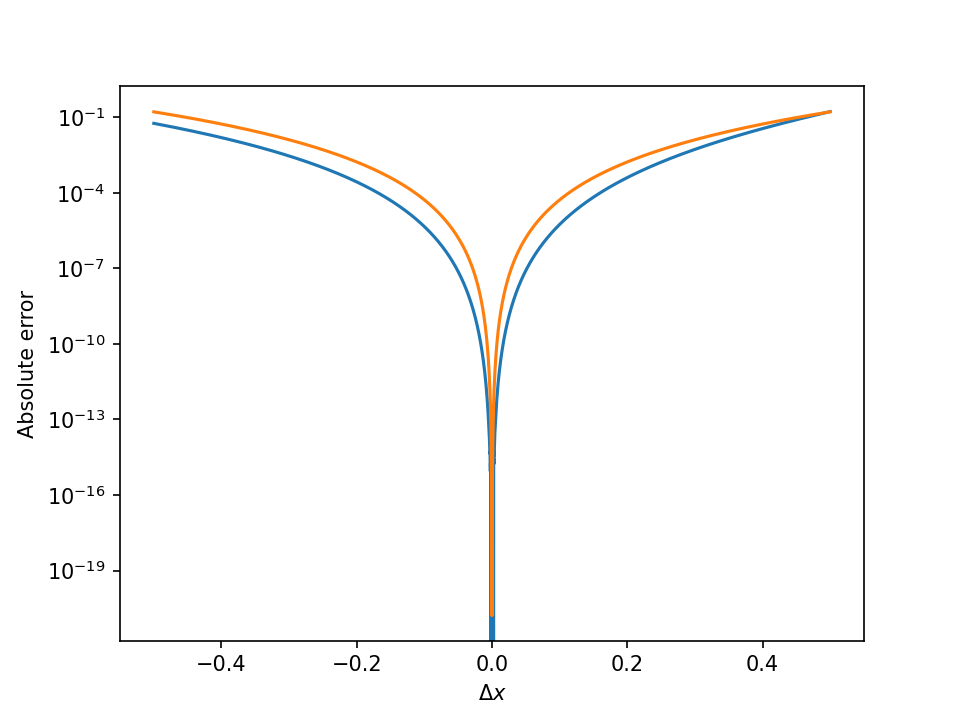

In [40]:
plt.figure()

plt.semilogy(deltas,err_actual)
plt.semilogy(deltas,err_estim)

plt.ylabel('Absolute error')
plt.xlabel(r'$\Delta x$')

plt.show()

## Multivariate function

The same concept can be applied to multivariable functions. An example of this is as follows

$$
f(x,y) = e^{xy}\cos(y/x)
$$

Let's create the approximation computing 5th order derivatives around $(x = \pi/6, y=\pi/3)$

In [112]:
x = np.pi/6 + oti.e(1,order=5)
y = np.pi/3 + oti.e(2,order=5)

f = oti.exp(x*y)*oti.cos(y/x)
f

-0.720071 + 5.255825 * e([1]) - 3.381969 * e([2]) - 0.326312 * e([[1,2]]) - 0.628886 * e([1,2]) - 0.358837 * e([[2,2]]) - 16.119228 * e([[1,3]]) + 34.971989 * e([[1,2],2]) - 18.656410 * e([1,[2,2]]) + 2.085264 * e([[2,3]]) + 77.302883 * e([[1,4]]) - 125.960219 * e([[1,3],2]) + 66.914672 * e([[1,2],[2,2]]) - 13.603529 * e([1,[2,3]]) + 0.663192 * e([[2,4]]) - 237.346074 * e([[1,5]]) + 346.802855 * e([[1,4],2]) - 145.588402 * e([[1,3],[2,2]]) + 9.772783 * e([[1,2],[2,3]]) + 3.193019 * e([1,[2,4]]) - 0.269992 * e([[2,5]])

We can generate a meshgrid to evaluate multiple deltas.

In [113]:
dx = np.linspace(-0.2,0.2,1000)
dy = np.linspace(-0.2,0.2,1000)

dX,dY = np.meshgrid(dx,dy)

fp_tse = f.rom_eval_object([1,2],[dX,dY])

# Estimate the error
err_est = np.abs(f.get_order_im(5).rom_eval_object([1,2],[dX,dY]))

# Evaluate the real function at the corresponding values.
xp = x.real + dX
yp = y.real + dY
fp_actual = np.exp(xp*yp)*np.cos(yp/xp)

err_actual = np.abs(fp_tse-fp_actual)

<IPython.core.display.Javascript object>


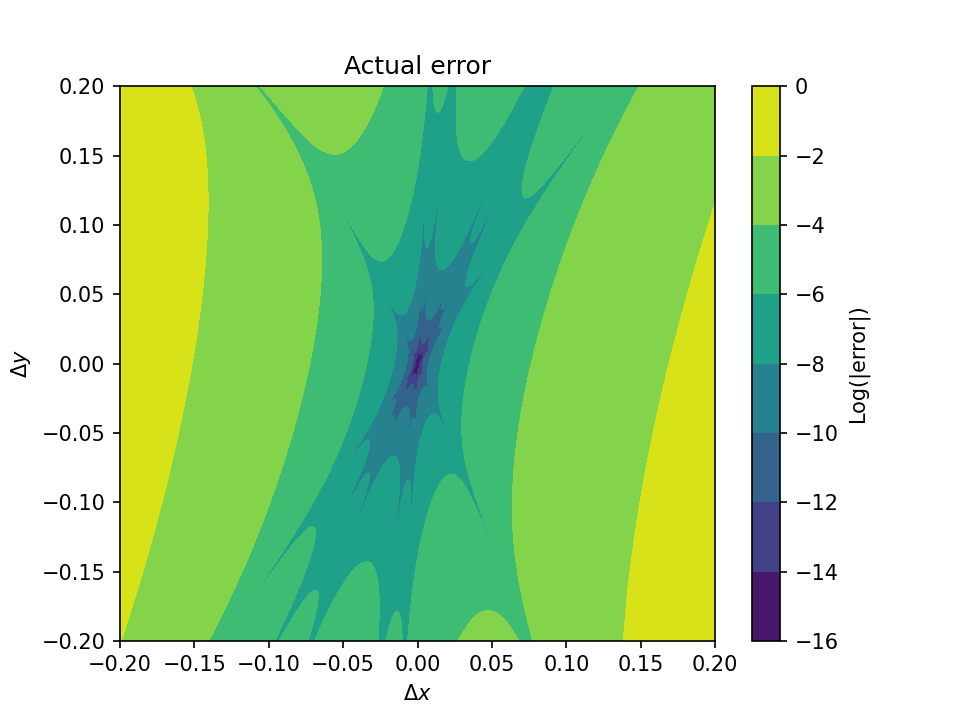

/tmp/ipykernel_1602/329203439.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.contourf(dX,dY,np.log10(err_actual),levels=np.arange(-16,1,2))


In [114]:
plt.figure()

plt.contourf(dX,dY,np.log10(err_actual),levels=np.arange(-16,1,2))

plt.title('Actual error')
plt.xlabel(r'$\Delta x$')
plt.ylabel(r'$\Delta y$')
cbar = plt.colorbar()
cbar.ax.set_ylabel('Log(|error|)')

plt.show()

<IPython.core.display.Javascript object>


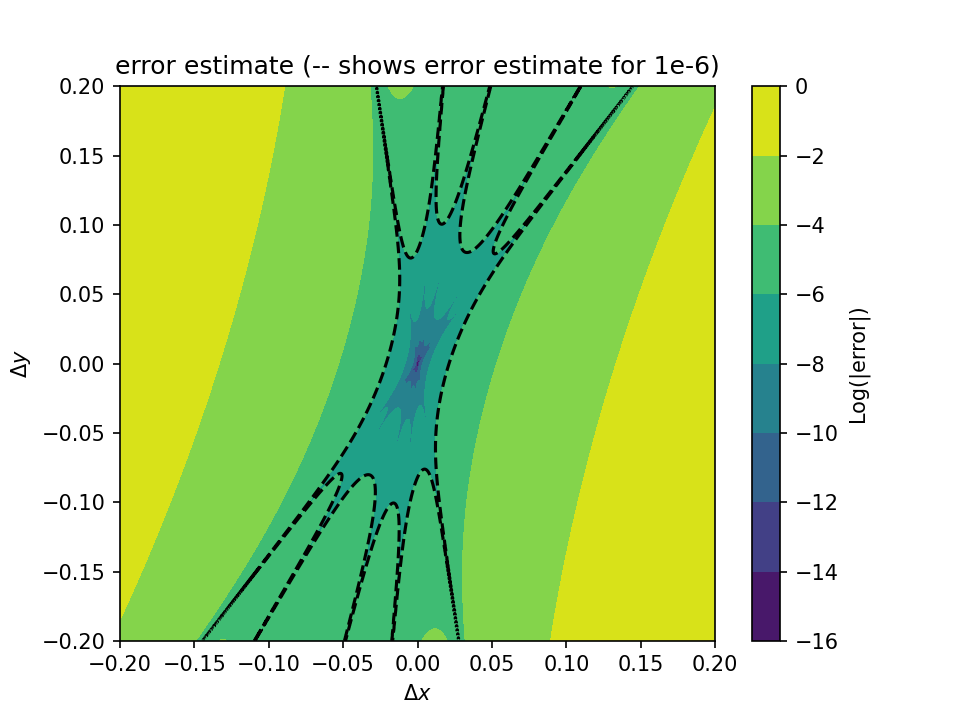

/tmp/ipykernel_1602/3093852233.py:10: UserWarning: The following kwargs were not used by contour: 'inline'
  plt.contour(dX,dY,np.log10(err_est),inline=True,levels=[-6],colors='k')


In [115]:
plt.figure()

plt.contourf(dX,dY,np.log10(err_est),levels=np.arange(-16,1,2))

plt.title('error estimate (-- shows error estimate for 1e-6)')
plt.xlabel(r'$\Delta x$')
plt.ylabel(r'$\Delta y$')
cbar = plt.colorbar()
cbar.ax.set_ylabel('Log(|error|)')
plt.contour(dX,dY,np.log10(err_est),inline=True,levels=[-6],colors='k')
plt.show()

<IPython.core.display.Javascript object>


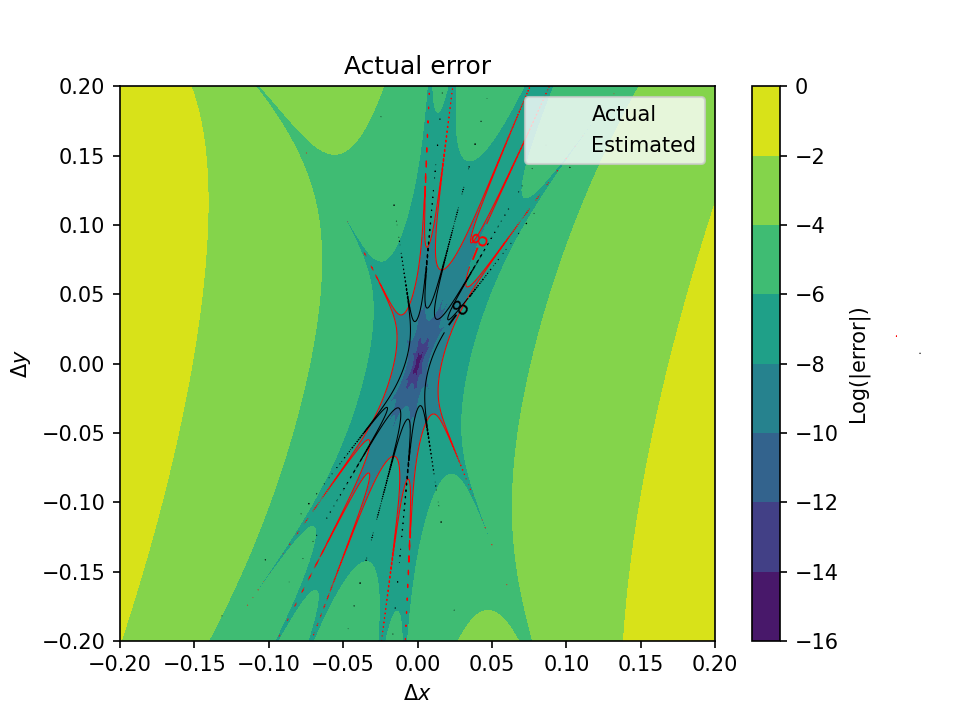

/tmp/ipykernel_1602/2512255861.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.contourf(dX,dY,np.log10(err_actual),levels=np.arange(-16,1,2))
/tmp/ipykernel_1602/2512255861.py:12: RuntimeWarning: divide by zero encountered in log10
  cont_act = plt.contour(dX,dY,np.log10(err_actual),levels=[-8],colors='r',linewidths=0.5,linestyles='-')


In [124]:
plt.figure()

plt.contourf(dX,dY,np.log10(err_actual),levels=np.arange(-16,1,2))

plt.title('Actual error')
plt.xlabel(r'$\Delta x$')
plt.ylabel(r'$\Delta y$')
cbar = plt.colorbar()
cbar.ax.set_ylabel('Log(|error|)')

# Highlight with red contour, error 10^-8
cont_act = plt.contour(dX,dY,np.log10(err_actual),levels=[-8],colors='r',linewidths=0.5,linestyles='-')
cont_act.clabel(inline=True)
cont_act.collections[0].set_label('Actual')


# Highlight with black contour, error 10^-8
cont_est = plt.contour(dX,dY,np.log10(err_est),levels=[-8],colors='k',linewidths=0.5,linestyles='-')
cont_est.clabel(inline=True)
cont_est.collections[0].set_label('Estimated')
plt.legend()

plt.show()
